In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ts = np.linspace(0, 20, num=100)
xs = 5*np.sin(2*np.pi*ts)
ts_train, ts_test = ts[:len(ts)//2], ts[len(ts)//2:]
xs_train, xs_test = xs[:len(xs)//2], xs[len(xs)//2:]
df_train = pd.DataFrame({'t': ts_train, 'x': xs_train})
df_test = pd.DataFrame({'t': ts_test, 'x': xs_test})

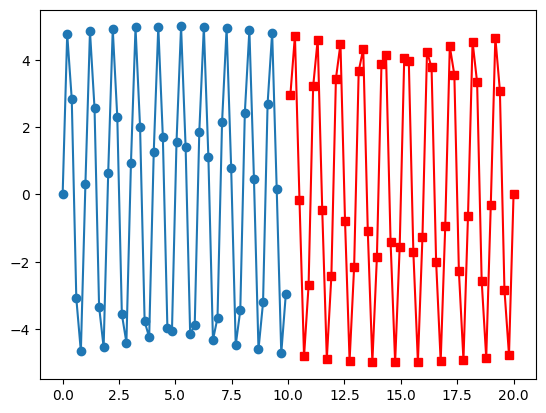

In [2]:
plt.plot(df_train.t, df_train.x, marker='o')
plt.plot(df_test.t, df_test.x, marker='s', color='r')

In [3]:
import bayesnf
import jax

In [4]:
model = bayesnf.BayesianNeuralFieldMAP(
  width=256,
  depth=2,
  seasonality_periods=[1, .5],
  feature_cols=['t'],
  target_col='x',
  observation_model='NORMAL',
  timetype='float',
  standardize=[])

In [41]:
# Test before training
import json
d0 = model.data_handler.to_dict()
handler = bayesnf.spatiotemporal.SpatiotemporalDataHandler.from_dict(json.loads(json.dumps(d)))
d1 = handler.to_dict()
assert d0 == d1

In [18]:
model = model.fit(
  df_train,
  seed=jax.random.PRNGKey(0),
  ensemble_size=4,
  num_epochs=500)

In [42]:
# Test before training
import json
d0 = model.data_handler.to_dict()
handler = bayesnf.spatiotemporal.SpatiotemporalDataHandler.from_dict(json.loads(json.dumps(d)))
d1 = handler.to_dict()
assert d0 == d1

In [ ]:
losses = np.row_stack(model.losses_)
fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.plot(losses.T)
ax.plot(np.mean(losses, axis=0), color='k', linewidth=3)

In [ ]:
yhat, yhat_quantiles = model.predict(df_test, quantiles=(0.025, 0.5, 0.975))

In [ ]:
params = model.params_
log_noise_scale = params[0]
treedef = jax.tree_util.tree_structure(mlp_template)
mlp_params = jax.tree_util.tree_unflatten(treedef, params[3:])
# predictions = mlp.apply(mlp_params, x)

In [ ]:
plt.plot(df_test.t, yhat_quantiles[1])
plt.plot(df_test.t, df_test.x)

In [ ]:
model.params_[0]

In [ ]:
params = flax.serialization.to_state_dict(model.params_)
params = jax.tree_util.tree_map(lambda x: x.tolist(), params)

In [ ]:
model.params_

In [ ]:
params.keys()

In [ ]:
params2 = jax.tree_util.tree_map(np.asarray, params, is_leaf=lambda x: isinstance(x, list))
maker = tfp.substrates.jax.internal.structural_tuple.structtuple(params2)

In [ ]:
model.params_ = flax.serialization.from_state_dict(maker(**params2), params2)